# Lab 5

In [102]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Question 1

This question will center around analysis of the `geyser` dataset in base `seaborn` package.  First download the dataset and name as `geyser_df`.


In [3]:
geyser_df = sns.load_dataset('geyser')
geyser_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   duration  272 non-null    float64
 1   waiting   272 non-null    int64  
 2   kind      272 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 6.5+ KB


### Part A

Create a scatterplot of the `geyser_df` that plots `waiting` on the x-axis and `duration` on the y-axis.  Make the color of the dot depend on the `kind` variable, use non-base coloring, and include a legend.  Be sure to label the x- and y- axes and give your graph a title.

Text(32.189509722222226, 0.5, 'Duration in sec')

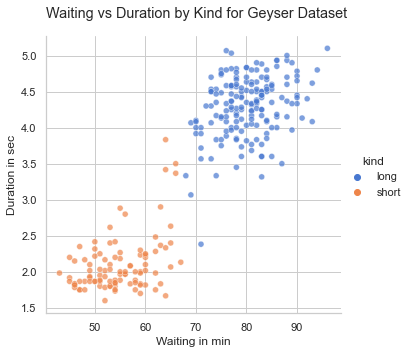

In [4]:
sns.set_theme(style="whitegrid")
sns.relplot(x="waiting", y="duration", hue="kind", alpha = .7, palette = "muted", data=geyser_df)
plt.suptitle("Waiting vs Duration by Kind for Geyser Dataset")
plt.subplots_adjust(top=.9)
plt.xlabel("Waiting in min")
plt.ylabel("Duration in sec")

### Part B

Based on the plot above, you see that there is a vast difference in the `duration` of long and short geyser events.  Before you conduct an ANOVA test, you want to compare side-by-side boxplots.  Plot `kind` on the x-axis and `duration` on the y-axis.  Use `kind` as hue of the boxplot.  Name the legend and place it in a spot that does not overlap any of the data.

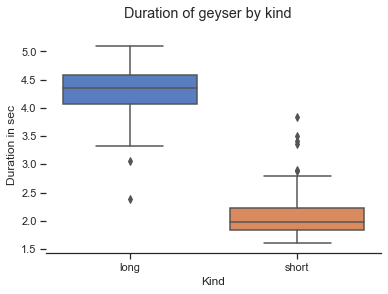

In [26]:
sns.set_theme(style="ticks")
sns.boxplot(x="kind", y="duration", data=geyser_df, palette="muted")
plt.suptitle("Duration of geyser by kind")
plt.ylabel("Duration in sec")
plt.xlabel("Kind")
sns.despine(left=True)


### Part C

Using Pandas "groupby" option, group the dataset `geyser_df` on `kind` and then find the mean, median, standard deviation and variance of the duration for both kinds of geyser events.

In [42]:
grouped_kind = geyser_df.groupby("kind").agg({"duration": ["mean", "median", "std", "var"]})
grouped_kind


duration                           
          mean median       std       var
kind                                     
long   4.29793  4.350  0.422677  0.178656
short  2.09433  1.983  0.394762  0.155837

### Part D

Suppose you want to test:

  H$_0$: Mean duration time of long and short geyser events are the same <br>
  H$_a$: Mean duration time of long and short geyser events are not the same

Conduct the ANOVA test at the 5% level of significance.  Include a p-value in your response.

Hint:  You will first import `scipy.stats as stats` and then use the following code:

`stats.f_oneway(df['y'][df['x'] == 'x1'], ..., [df['y'][df['x'] == 'xd'])`

Where `df` is the dataframe that holds the data to be used in the ANOVA analysis, `y` is the numerical variable you are finding/comparing means of, `x` is the categorical variable you are splitting the data based on, and `x1` to `xd` are the categorical variable output types.

In [52]:
import scipy.stats as stats
stats.f_oneway(geyser_df['duration'][geyser_df['kind'] == 'long'], 
                geyser_df['duration'][geyser_df['kind'] == 'short'])

F_onewayResult(statistic=1803.1781257548184, pvalue=1.5998565310069283e-121)

### Part E
Is there evidence of a difference between the long and short geyser event means?

Answer:  Yes, there is sufficient evidence to reject the null hypothesis that the mean duration time of long and short geyser events are the same.  This is evident by the p-value of <.0001 (less than alpha of .05), F= 1803.18.  Thus, we can conclude there is a statistically significant differnt between the means of the geyser type groups for duration.  (Provided we are pass all assumption checks for the one way ANOVA)

## Question 2

This question will center around analysis of the car crashes dataset in base seaborn package. First download the dataset and name as `carcrash_data`.

You can read about the variables here:  https://www.kaggle.com/fivethirtyeight/fivethirtyeight-bad-drivers-dataset.  The variables reported include:

- `total`: Number of drivers involved in fatal collisions per billion miles
- `speeding`: Percentage Of Drivers Involved In Fatal Collisions Who Were Speeding
- `alcohol`: Percentage Of Drivers Involved In Fatal Collisions Who Were Alcohol-Impaired
- `not_distracted`: Percentage Of Drivers Involved In Fatal Collisions Who Were Not Distracted
- `no_previous`: Percentage Of Drivers Involved In Fatal Collisions Who Had Not Been Involved In Any Previous Accidents
- `ins_premium`: Car Insurance Premiums in dollars
- `ins_losses`: Losses incurred by insurance companies for collisions per insured driver in dollars
- `abbrev`: State

In [99]:
carcrash_data = sns.load_dataset('car_crashes')

### Part A

Create a new column variable, `region`, which will classify the state based on the following definitions:

- `Northeast`: ME, NH, Vermont, MA, RI, CT, NY, NJ, and PA
- `Midwest`: OH, MI, IN, WI, IL, MN, IA, MO, ND, SD, NE, and KS
- `South`: DE, MD, VA, WV, KY, NC, SC, TN, GA, FL, AL, MS, AR, LA, TX, and OK
- `West`: MT, ID, WY, CO, NM, AZ, UT, NV, CA, OR, WA, AK, and HI

Create a column variable, `premium`, that reports "Above average" if the `ins_premium` value is above the average of the `ins_premium` and "Below average" elsewise.

Remove the row corresponding to "DC".

In [122]:
carcrash_data.drop([8], axis=0, inplace=True)

In [123]:
states = [["ME", "NH", "VT", "MA", "RI", "CT", "NY", "NJ", "PA"], ["OH", "MI", "IN", "WI", "IL", "MN", "IA", "MO", "ND", "SD", "NE", "KS"],
        ["DE", "MD", "VA", "WV", "KY", "NC", "SC", "TN", "GA", "FL", "AL", "MS", "AR", "LA", "TX", "OK"], ["MT", "ID", "WY", "CO", "NM", "AZ", "UT", "NV", "CA", "OR", "WA", "AK", "HI"]]
regions = ["Northeast", "Midwest", "South", "West"]
region1 = {}
for key, value in zip(regions, states):
    region1[key] = value

In [126]:
region=[]
for ele in carcrash_data["abbrev"]:
    for vals in region1.values():
        for state in vals:
            if ele == state:
                region.append(list(region1.keys())[list(region1.values()).index(vals)])
carcrash_data["region"]=region


In [127]:
premium=[]
for ele in carcrash_data["ins_premium"]:
    if ele > carcrash_data["ins_premium"].mean():
        premium.append("Above average")
    else:
        premium.append("Below average")
carcrash_data["premium"] = premium
carcrash_data



,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev,premium,region
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL,Below average,South
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK,Above average,West
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ,Above average,West
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR,Below average,South
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA,Below average,West
5,13.6,5.032,3.808,10.744,12.920,835.50,139.91,CO,Below average,West
6,10.8,4.968,3.888,9.396,8.856,1068.73,167.02,CT,Above average,Northeast
7,16.2,6.156,4.860,14.094,16.038,1137.87,151.48,DE,Above average,South
9,17.9,3.759,5.191,16.468,16.826,1160.13,144.18,FL,Above average,South
10,15.6,2.964,3.900,14.820,14.508,913.15,142.80,GA,Above average,South


### Part B

Graph facetted histograms based on `ins_losses` variable.  Include 10 bins and color the histograms based on `region`.  The rows should represent `premium` and the columns should represent `region`, both variables created in part a.  On the y-axis, showcase the density.

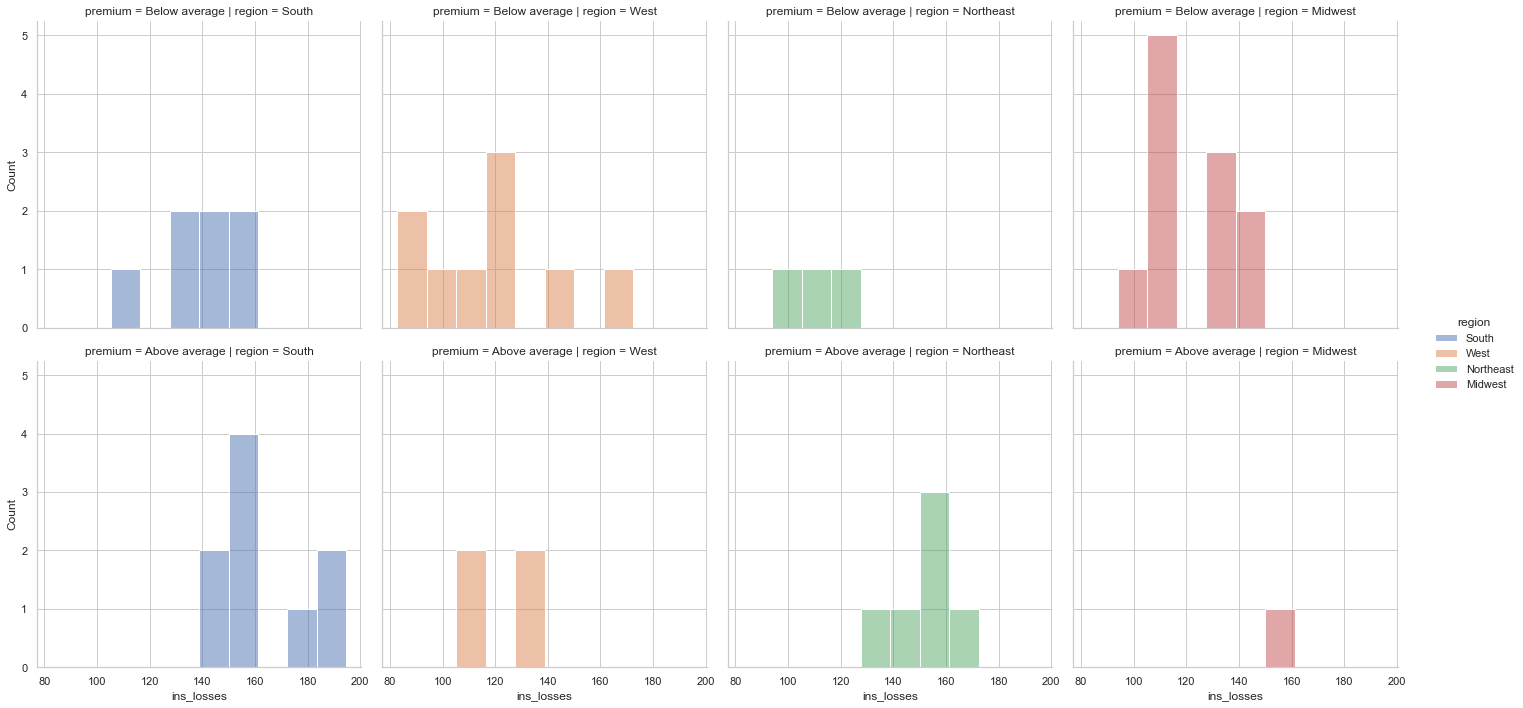

In [130]:
sns.set_theme(style="whitegrid")
sns.displot(carcrash_data, x = "ins_losses", col = "region", row = "premium", bins = 10, hue = "region")


### Part C

Create a pair plot of `carcrash_df` comparing `ins_premium`, `ins_losses`, `region`, `premium`, `total`, `speeding`, `alcohol`.

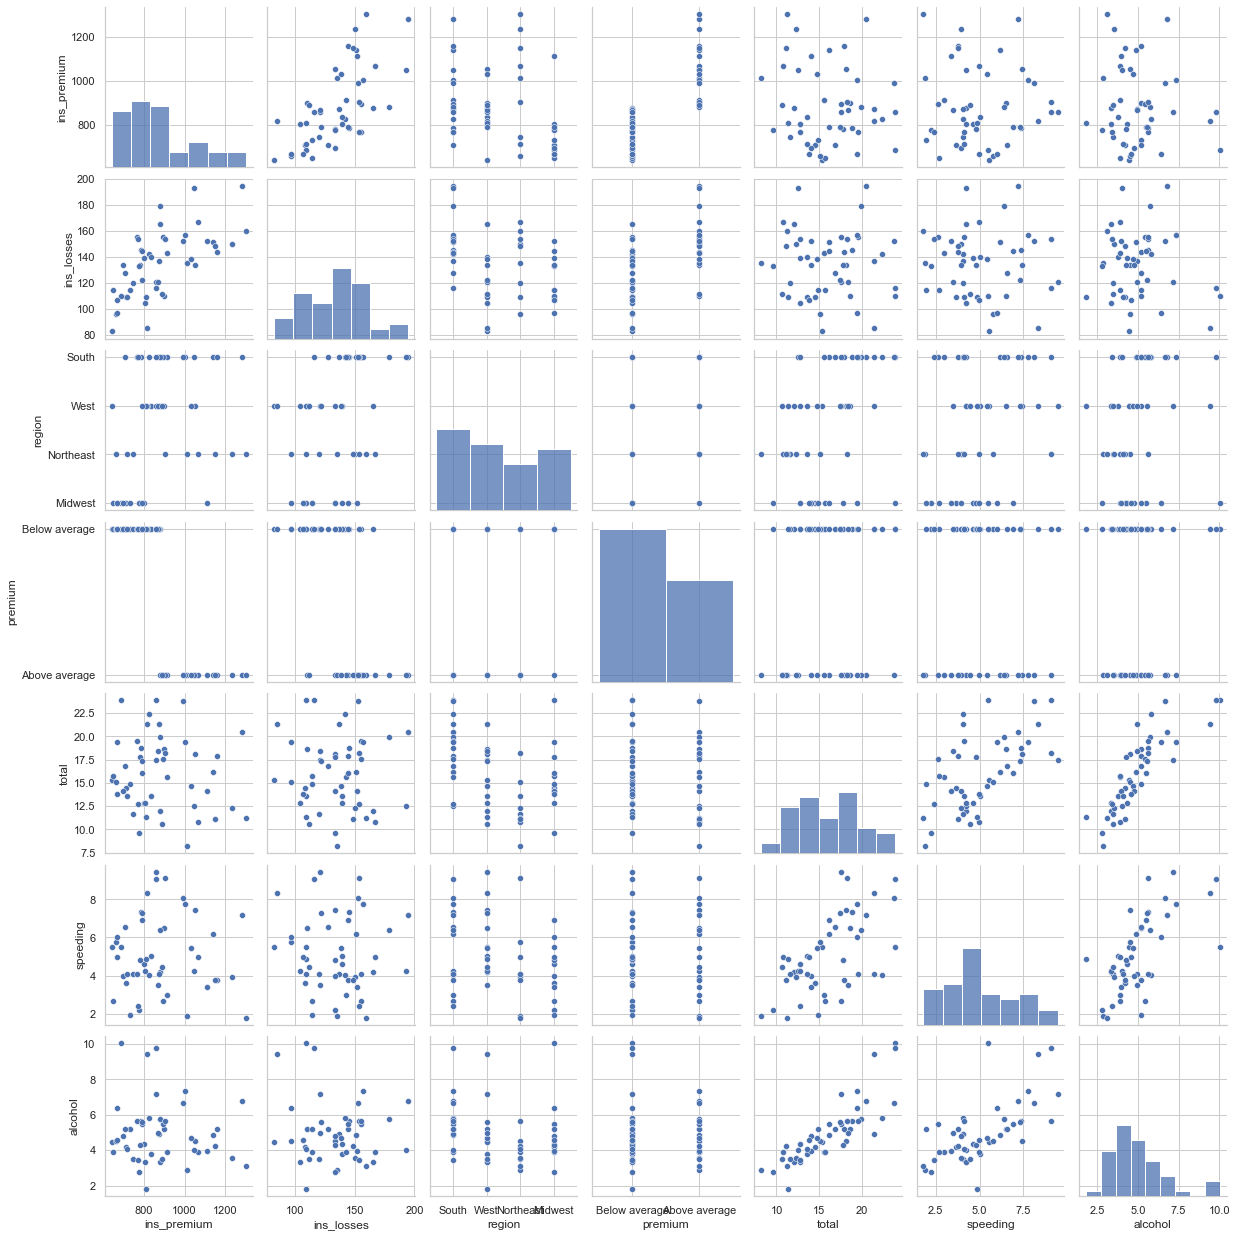

In [136]:
sns.pairplot(carcrash_data, vars=["ins_premium", "ins_losses", "region", "premium", "total", "speeding", "alcohol"])

### Part D

Analyzing the pairplot above, which variables do you think are highly correlated?  Does the region seem to have any difference on the relationship between the variables?

Ans: There appears to be the following highly correlated variable relationships: total fatalities and alcohol (positive, linear), total fatalities and speeding (positive linear), insurance losses and insurance premium (positive linear), and speeding and alcohol(positive linear).  Additionally, the midwest region appears to lowest insurance premiums, while the northeast has the most variance.  The south appears to have more insurance losses and more total fatalities in comparison to the other regions.  


## Question 3

The following questions will be analyzing the `planets` data in Seaborn package.  Import the data using the code below:

In [137]:
planets_data = sns.load_dataset('planets')
sns.set_theme(style = "ticks", palette = "pastel")
planets_data

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300000,7.10,77.40,2006
1,Radial Velocity,1,874.774000,2.21,56.95,2008
2,Radial Velocity,1,763.000000,2.60,19.84,2011
3,Radial Velocity,1,326.030000,19.40,110.62,2007
4,Radial Velocity,1,516.220000,10.50,119.47,2009
...,...,...,...,...,...,...
1030,Transit,1,3.941507,NaN,172.00,2006
1031,Transit,1,2.615864,NaN,148.00,2007
1032,Transit,1,3.191524,NaN,174.00,2007
1033,Transit,1,4.125083,NaN,293.00,2008


### Part A

First, clean the data so that none of the columns have NaN response values.  Name this new dataset `planets_df`.  Then add a variable called `dis_flag` that returns "Far" if the distance is more then the average and "Not Far" if the distance is less than the average.

In [169]:
planets_df = planets_data.dropna()
dis_flag = ["Far" if ele > planets_df["distance"].mean() else "Not Far" for ele in planets_df["distance"]]
planets_df["dis_flag"] = dis_flag
planets_df

/var/folders/jx/720kx0q96mlcb_x1fp6xngw00000gn/T/ipykernel_7073/1504158406.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  planets_df["dis_flag"] = dis_flag


,method,number,orbital_period,mass,distance,year,dis_flag
0,Radial Velocity,1,269.30000,7.100,77.40,2006,Far
1,Radial Velocity,1,874.77400,2.210,56.95,2008,Far
2,Radial Velocity,1,763.00000,2.600,19.84,2011,Not Far
3,Radial Velocity,1,326.03000,19.400,110.62,2007,Far
4,Radial Velocity,1,516.22000,10.500,119.47,2009,Far
...,...,...,...,...,...,...,...
640,Radial Velocity,1,111.70000,2.100,14.90,2009,Not Far
641,Radial Velocity,1,5.05050,1.068,44.46,2013,Not Far
642,Radial Velocity,1,311.28800,1.940,17.24,1999,Not Far
649,Transit,1,2.70339,1.470,178.00,2013,Far


### Part B

Using a layered histogram, plot the density distribution of `year` with the overlapping bars representing the `dis_flag` variable.  Include a title, legend, axis labels.

Text(0.5, 0, 'Year')

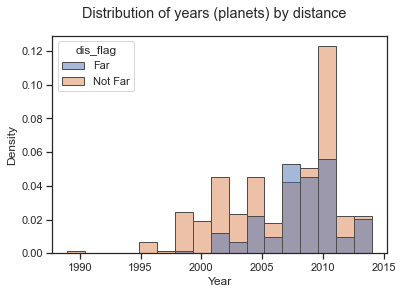

In [193]:
sns.set_theme(style="ticks")
sns.histplot(planets_df, x = "year", hue="dis_flag", edgecolor = ".3", alpha=0.5, stat="density")
plt.suptitle("Distribution of years (planet) by distance")
plt.xlabel("Year")

### Part C

Does it appear there is a trend between year and distance of the planet?  When are "far" planets mostly found?

Ans: Far planets are mostly found between the years 2005 and 2010, where there is the highest cumulative density.  As the years increase from 1990 there appears to overall an increase in distance.  


## Question 4

Anscombe's quartet comprises four data sets that have nearly identical simple descriptive statistics, yet have very different distributions and appear very different when graphed. Each dataset consists of eleven (x,y) points. They were constructed in 1973 by the statistician Francis Anscombe to demonstrate both the importance of graphing data before analyzing it and the effect of outliers and other influential observations on statistical properties. He described the article as being intended to counter the impression among statisticians that "numerical calculations are exact, but graphs are rough."



In [200]:
anscombe_df = sns.load_dataset("anscombe")
anscombe_df.head()

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33


### Part A

Find the mean and variance of `x` and `y` grouping on the `dataset`.
Then, find the mean and variance of `x` and `y` without any grouping.

In [207]:
anscombe_df.groupby("dataset").agg(["mean", "var"])

x               y          
        mean   var      mean       var
dataset                               
I        9.0  11.0  7.500909  4.127269
II       9.0  11.0  7.500909  4.127629
III      9.0  11.0  7.500000  4.122620
IV       9.0  11.0  7.500909  4.123249

In [208]:
anscombe_df.agg(["mean", "var"])

,x,y
mean,9.000000,7.500682
var,10.232558,3.837388


### Part B

Find the correlation between `x` and `y` grouped on `dataset`.
Then, find the correlation between `x` and `y` without any grouping.  Display your answers as correlation matrices.

In [214]:
anscombe_df.groupby("dataset").corr()

x         y
dataset                      
I       x  1.000000  0.816421
        y  0.816421  1.000000
II      x  1.000000  0.816237
        y  0.816237  1.000000
III     x  1.000000  0.816287
        y  0.816287  1.000000
IV      x  1.000000  0.816521
        y  0.816521  1.000000

In [211]:
anscombe_df.corr()

,x,y
x,1.000000,0.816366
y,0.816366,1.000000


### Part C

For each of the datasets, find the parameter estimates for the slope and y-intercept using `np.polyfit(x =, y =, d =)` where `d` is the degree.  Since we are plotting simple linear regression models, the degree we want is 1.  The output of `np.polyfit()` will be of the form: `array([a, b])`.  `a` output will be the slope and `b` output will be y-intercept.

Display your calculated slope and y-intercept values in a dataframe with the dataset as rows and slope and y-intercept as columns.  Include labeling.

In [246]:
def regress(df):
    x = df['x']
    y = df['y']
    return np.polyfit(x = x, y = y, deg = 1)
dat = anscombe_df.groupby("dataset").apply(regress)
new_df = pd.DataFrame(dat)
new_df

,0
dataset,
I,"[0.5000909090909095, 3.0000909090909076]"
II,"[0.5000000000000004, 3.000909090909089]"
III,"[0.4997272727272731, 3.0024545454545453]"
IV,"[0.49990909090909064, 3.0017272727272735]"


### Part D

Use facet graphing to graph a scatterplot of `x` versus `y` for each dataset. Colorize each of the scatterplots based on the `dataset`.  Include the linear regression equation on each of the graphs but do not include the confidence bands.

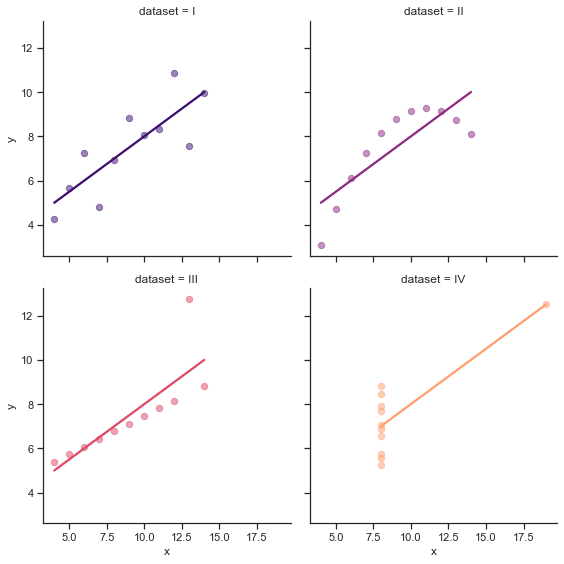

In [230]:
sns.lmplot(x="x", y="y", col="dataset", hue="dataset", data=anscombe_df,
           col_wrap=2, ci=None, palette="magma", height=4,
           scatter_kws={"s": 40, "alpha": .5})

### Part E

What does this exercise show you about relying on numeric outputs for statistical analysis?

Ans:  Numeric output quantify descriptive stats for datasets but they fail to show the nuance of the patterns and shape of the data that leads to those values.  For example, each dataset has a spread and shape much different from another.  If this was real world data, the visual inspection fo the data would provide important context for properly applying and interpreting statistical analysis.  Without such inspection, it would be easy to apply models and methods but violate the assumptions required to use them.  Further, if modeling, we could easily develop and incorrectly fit algirthm in context of the data (poor predictive value).  